[Reference](https://datasans.medium.com/k-means-cluster-okay-you-built-the-model-then-what-no-math-a0e710b42252)

In [1]:
import pandas as pd
# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(url)
# Clean and preprocess the data
df = df.drop(['Region', 'Channel'], axis=1)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

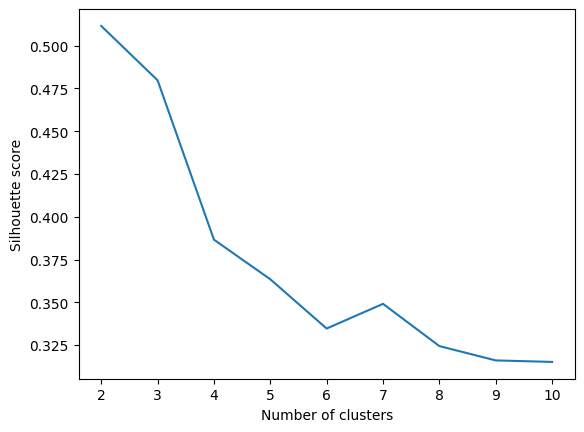

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize an empty list to store the silhouette scores
scores = []

# Try different numbers of clusters
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    scores.append(score)

# Plot the silhouette scores
import matplotlib.pyplot as plt
plt.plot(range(2, 11), scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [3]:
# Choose k = 5 clusters
kmeans = KMeans(n_clusters=5)

# Fit the model to the data
kmeans.fit(df)

# Get the cluster labels
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


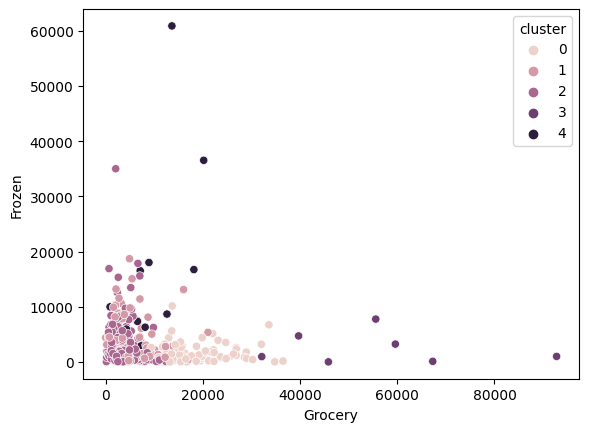

In [4]:
# Add the cluster labels to the dataframe
df['cluster'] = labels

# Plot the data points, colored by cluster
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(x=df['Grocery'], y=df['Frozen'], hue=df['cluster'], legend='full')
plt.xlabel('Grocery')
plt.ylabel('Frozen')
plt.show()

In [5]:
# Group the data by the predicted cluster
cluster_group = df.groupby(['cluster'])

# Calculate the mean of each feature for each cluster
cluster_mean = cluster_group.mean().reset_index()
cluster_mean

,cluster,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,4991.481481,12140.543210,18505.506173,1591.111111,8148.246914,1822.407407
1,1,23631.093458,3864.691589,5156.607477,3762.093458,1109.981308,1682.981308
2,2,6349.922414,3260.870690,4057.625000,2588.530172,1203.500000,1000.840517
3,3,20031.285714,38084.000000,56126.142857,2564.571429,27644.571429,2548.142857
4,4,56453.307692,10026.230769,8739.000000,15518.076923,1258.230769,7170.538462


In [6]:
# Define a color map
color_map = sns.diverging_palette(10, 220, as_cmap=True)

cluster_mean.style.background_gradient(cmap=color_map, subset=list(set(cluster_mean.columns)-{'cluster'}))

,cluster,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0,4991.481481,12140.543210,18505.506173,1591.111111,8148.246914,1822.407407
1,1,23631.093458,3864.691589,5156.607477,3762.093458,1109.981308,1682.981308
2,2,6349.922414,3260.870690,4057.625000,2588.530172,1203.500000,1000.840517
3,3,20031.285714,38084.000000,56126.142857,2564.571429,27644.571429,2548.142857
4,4,56453.307692,10026.230769,8739.000000,15518.076923,1258.230769,7170.538462
